In [1]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv('result_csv/top_func_list_mnist_128_consistency.csv', header=None)

# Filter the lines based on the remainder of 3
# use iloc and get 3 groups of aggregated rows , %3 == 0, %3 == 1, %3 == 2
df_0 = df.iloc[::3]
df_1 = df.iloc[1::3]
df_2 = df.iloc[2::3]

# re index the dataframes
df_0.reset_index(drop=True, inplace=True)
df_1.reset_index(drop=True, inplace=True)
df_2.reset_index(drop=True, inplace=True)


# for each dataframe, count the number of unique functions
df_0_unique = df_0[0].nunique()
df_0_unique += df_0[1].nunique()
df_0_unique += df_0[2].nunique()
print(f"df_0_unique: {df_0_unique}")
# count each possible functions in dataframe.
df_0_count_1 = df_0[0].value_counts()
df_0_count_2 = df_0[1].value_counts()
df_0_count_3 = df_0[2].value_counts()

# now sum the counts of each function in each dataframe
df_0_count = df_0_count_1.add(df_0_count_2, fill_value=0).add(df_0_count_3, fill_value=0)
df_0_count = df_0_count.sort_values(ascending=False)
print(df_0_count)

# lets do this in general way. 
def count_unique_and_sum(df,idx):
    df_unique = df[0].nunique()
    df_unique += df[1].nunique()
    df_unique += df[2].nunique()
    print(f"df_unique: {df_unique}")
    # count each possible functions in dataframe.
    df_count_1 = df[0].value_counts()
    df_count_2 = df[1].value_counts()
    df_count_3 = df[2].value_counts()

    # now sum the counts of each function in each dataframe
    df_count = df_count_1.add(df_count_2, fill_value=0).add(df_count_3, fill_value=0)
    df_count = df_count.sort_values(ascending=False)
    print(df_count)
    
    # aand plot the df_count
    df_count.plot(kind='bar')
    # x labels are not visible, so rotate them 45
    plt.xticks(rotation=45)
    plt.title(f'Function histogram of layer {idx}')
    
    # can you add auxiliary table inside the plot?
    
    
    plt.show()
    
    

df_0_unique: 30
add              28.0
sub              23.0
neg              18.0
equal            12.0
relu              9.0
floor             6.0
sin               6.0
abs               5.0
greater_equal     5.0
clamp             4.0
round             4.0
clip              4.0
cos               3.0
frac              2.0
greater           1.0
sigmoid           1.0
trunc             1.0
dtype: float64


df_unique: 30
add              28.0
sub              23.0
neg              18.0
equal            12.0
relu              9.0
floor             6.0
sin               6.0
abs               5.0
greater_equal     5.0
clamp             4.0
round             4.0
clip              4.0
cos               3.0
frac              2.0
greater           1.0
sigmoid           1.0
trunc             1.0
dtype: float64


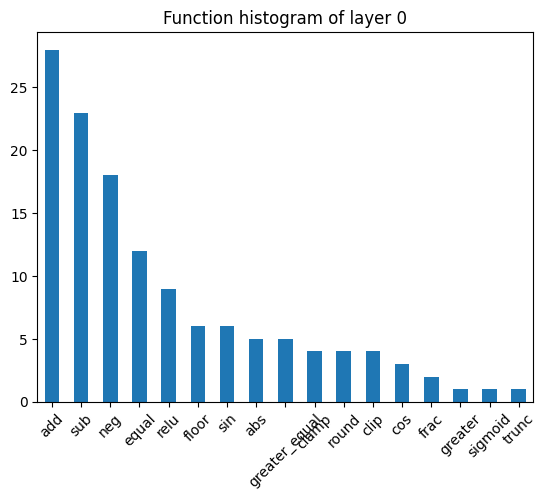

In [2]:
count_unique_and_sum(df_0,0)

df_unique: 16
clamp      43.0
clip       31.0
add        27.0
abs        14.0
sub         9.0
mean        3.0
maximum     3.0
frac        1.0
minimum     1.0
dtype: float64


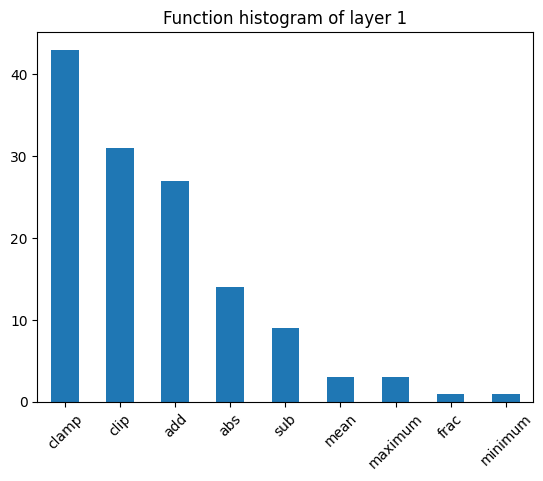

In [3]:
count_unique_and_sum(df_1, 1)

df_unique: 25
add        20.0
clamp      20.0
sub        20.0
mean       19.0
clip       13.0
maximum    11.0
frac       11.0
minimum     7.0
greater     5.0
abs         4.0
neg         1.0
sin         1.0
dtype: float64


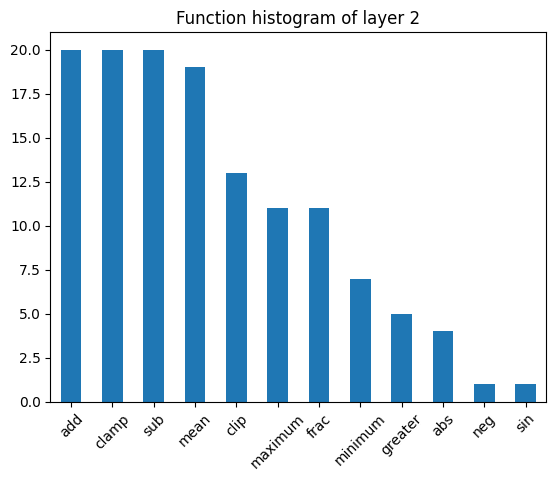

In [4]:
count_unique_and_sum(df_2, 2)